In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
!pip install librosa

In [3]:
import librosa

In [4]:
base_dir=r"/content/drive/MyDrive/TESS Toronto emotional speech set data"

In [5]:
def extract_fft_features(file_path, fixed_length):
    y, sr = librosa.load(file_path, sr=None)
    fft_result = np.fft.fft(y)
    magnitude_spectrum = np.abs(fft_result)
    # Use the first half of the FFT result
    features = magnitude_spectrum[:len(magnitude_spectrum) // 2]
    # Pad or trim the features to the fixed length
    if len(features) < fixed_length:
        features = np.pad(features, (0, fixed_length - len(features)), 'constant')
    else:
        features = features[:fixed_length]
    return features

In [6]:
data = []

In [7]:
# Fixed length for FFT features
fixed_length = 1000

In [8]:
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    if os.path.isdir(class_path):
        # Loop through each audio file in the class directory
        for file_name in os.listdir(class_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(class_path, file_name)
                features = extract_fft_features(file_path, fixed_length)
                # Combine the file name, class, and features into one row
                row = [file_name, class_dir] + features.tolist()
                data.append(row)

In [9]:
columns = ['file_name', 'class'] + [f'fft_{i}' for i in range(fixed_length)]
df = pd.DataFrame(data, columns=columns)

In [10]:
df.to_csv('audio_fft_features.csv', index=False)

In [11]:
df=pd.read_csv('audio_fft_features.csv')

In [12]:
df.head()

,file_name,class,fft_0,fft_1,fft_2,fft_3,fft_4,fft_5,fft_6,fft_7,...,fft_990,fft_991,fft_992,fft_993,fft_994,fft_995,fft_996,fft_997,fft_998,fft_999
0,OAF_bone_neutral.wav,neutral,0.678284,0.868584,4.204409,3.519414,12.734366,12.783788,12.034661,17.189386,...,0.229235,0.501679,0.362728,0.440439,0.486017,0.273568,0.456743,0.142623,0.623139,0.260040
1,OAF_cab_neutral.wav,neutral,0.995575,1.547579,2.291896,8.094669,8.582493,13.306904,27.016625,31.039884,...,0.513660,0.041963,0.653816,0.918425,1.195685,0.743834,0.347799,0.744330,1.408103,1.390403
2,OAF_burn_neutral.wav,neutral,1.603699,2.794527,6.935659,2.575547,5.723130,12.139798,18.626158,18.166583,...,4.199815,3.887916,4.052369,3.649007,3.106534,3.389729,2.340651,3.457726,3.220975,2.057703
3,OAF_back_neutral.wav,neutral,1.123108,0.768683,2.041808,3.309860,9.540181,12.717255,7.621601,16.568951,...,1.102851,0.626617,0.279537,0.933479,1.165472,1.430121,1.144022,1.153814,0.323516,0.697930
4,OAF_calm_neutral.wav,neutral,2.991150,3.446368,3.462696,3.628997,8.624616,21.362487,23.112578,7.861204,...,0.896511,3.570638,4.998622,1.869090,4.126411,7.257709,3.231238,4.070044,9.723223,4.027806


In [13]:
df['class'].unique()

array(['neutral', 'disgust', 'Sad', 'Pleasant_surprise', 'angry', 'Fear',
       'happy'], dtype=object)

In [14]:
df.drop(columns=['file_name'], inplace=True)

In [15]:
df.head()

,class,fft_0,fft_1,fft_2,fft_3,fft_4,fft_5,fft_6,fft_7,fft_8,...,fft_990,fft_991,fft_992,fft_993,fft_994,fft_995,fft_996,fft_997,fft_998,fft_999
0,neutral,0.678284,0.868584,4.204409,3.519414,12.734366,12.783788,12.034661,17.189386,9.604088,...,0.229235,0.501679,0.362728,0.440439,0.486017,0.273568,0.456743,0.142623,0.623139,0.260040
1,neutral,0.995575,1.547579,2.291896,8.094669,8.582493,13.306904,27.016625,31.039884,11.201365,...,0.513660,0.041963,0.653816,0.918425,1.195685,0.743834,0.347799,0.744330,1.408103,1.390403
2,neutral,1.603699,2.794527,6.935659,2.575547,5.723130,12.139798,18.626158,18.166583,14.980629,...,4.199815,3.887916,4.052369,3.649007,3.106534,3.389729,2.340651,3.457726,3.220975,2.057703
3,neutral,1.123108,0.768683,2.041808,3.309860,9.540181,12.717255,7.621601,16.568951,18.621911,...,1.102851,0.626617,0.279537,0.933479,1.165472,1.430121,1.144022,1.153814,0.323516,0.697930
4,neutral,2.991150,3.446368,3.462696,3.628997,8.624616,21.362487,23.112578,7.861204,9.297522,...,0.896511,3.570638,4.998622,1.869090,4.126411,7.257709,3.231238,4.070044,9.723223,4.027806


In [16]:
df['class'] = df['class'].replace({'neutral':0, 'disgust':1,'Sad':2,'Pleasant_surprise':3, 'angry':4, 'Fear':5,
       'happy':6})


In [17]:
df.head()

,class,fft_0,fft_1,fft_2,fft_3,fft_4,fft_5,fft_6,fft_7,fft_8,...,fft_990,fft_991,fft_992,fft_993,fft_994,fft_995,fft_996,fft_997,fft_998,fft_999
0,0,0.678284,0.868584,4.204409,3.519414,12.734366,12.783788,12.034661,17.189386,9.604088,...,0.229235,0.501679,0.362728,0.440439,0.486017,0.273568,0.456743,0.142623,0.623139,0.260040
1,0,0.995575,1.547579,2.291896,8.094669,8.582493,13.306904,27.016625,31.039884,11.201365,...,0.513660,0.041963,0.653816,0.918425,1.195685,0.743834,0.347799,0.744330,1.408103,1.390403
2,0,1.603699,2.794527,6.935659,2.575547,5.723130,12.139798,18.626158,18.166583,14.980629,...,4.199815,3.887916,4.052369,3.649007,3.106534,3.389729,2.340651,3.457726,3.220975,2.057703
3,0,1.123108,0.768683,2.041808,3.309860,9.540181,12.717255,7.621601,16.568951,18.621911,...,1.102851,0.626617,0.279537,0.933479,1.165472,1.430121,1.144022,1.153814,0.323516,0.697930
4,0,2.991150,3.446368,3.462696,3.628997,8.624616,21.362487,23.112578,7.861204,9.297522,...,0.896511,3.570638,4.998622,1.869090,4.126411,7.257709,3.231238,4.070044,9.723223,4.027806


In [18]:
y = df['class']

In [19]:
X = df.drop(columns=['class'])

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.svm import SVC

In [23]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [24]:
classifiers={
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'GaussianNB':GaussianNB(),
    'LogisticRegression':LogisticRegression(),
    'SVM-sigmoid':SVC(kernel='sigmoid'),
    'SVM-rbf':SVC(kernel='rbf'),
    'SVM-linear':SVC(kernel='linear'),
     'LGBMClassifier':LGBMClassifier(),
     'XGBClassifier':XGBClassifier()
}

In [25]:
from matplotlib import pyplot as plt

Training and Evaluating RandomForestClassifier
RandomForestClassifierAccuracy: 0.8375
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       0.78      0.73      0.76        89
           2       0.79      0.92      0.85        77
           3       0.80      0.80      0.80        86
           4       0.96      0.86      0.90        76
           5       0.87      0.83      0.85        83
           6       0.73      0.74      0.73        73

    accuracy                           0.84       560
   macro avg       0.84      0.84      0.84       560
weighted avg       0.84      0.84      0.84       560



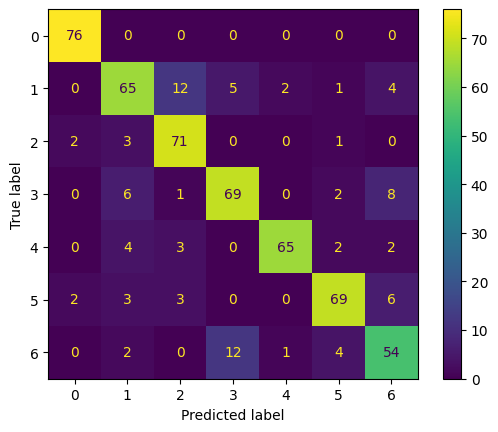

Training and Evaluating GradientBoostingClassifier
GradientBoostingClassifierAccuracy: 0.8339285714285715
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        76
           1       0.80      0.79      0.80        89
           2       0.84      0.95      0.89        77
           3       0.76      0.74      0.75        86
           4       0.96      0.86      0.90        76
           5       0.94      0.75      0.83        83
           6       0.66      0.78      0.72        73

    accuracy                           0.83       560
   macro avg       0.84      0.84      0.84       560
weighted avg       0.84      0.83      0.83       560



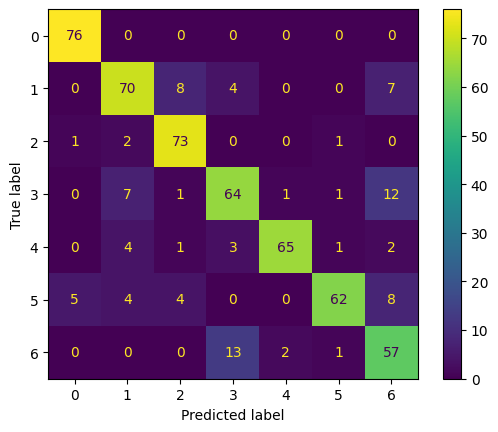

Training and Evaluating GaussianNB
GaussianNBAccuracy: 0.5857142857142857
              precision    recall  f1-score   support

           0       0.83      0.99      0.90        76
           1       0.42      0.87      0.57        89
           2       0.91      0.56      0.69        77
           3       0.70      0.36      0.48        86
           4       0.46      0.68      0.55        76
           5       0.68      0.30      0.42        83
           6       0.54      0.34      0.42        73

    accuracy                           0.59       560
   macro avg       0.65      0.59      0.58       560
weighted avg       0.65      0.59      0.57       560



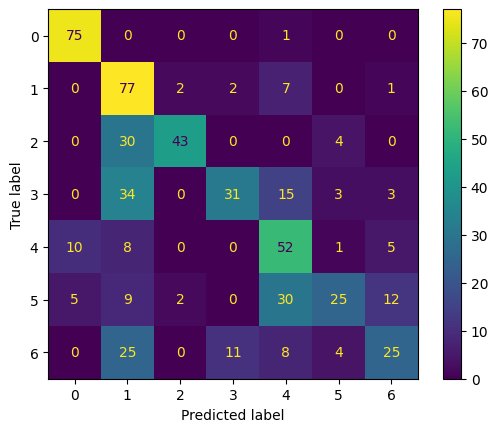

Training and Evaluating LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionAccuracy: 0.48928571428571427
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        76
           1       0.35      0.36      0.36        89
           2       0.55      0.68      0.61        77
           3       0.48      0.37      0.42        86
           4       0.51      0.58      0.54        76
           5       0.47      0.41      0.44        83
           6       0.25      0.27      0.26        73

    accuracy                           0.49       560
   macro avg       0.50      0.49      0.49       560
weighted avg       0.49      0.49      0.49       560



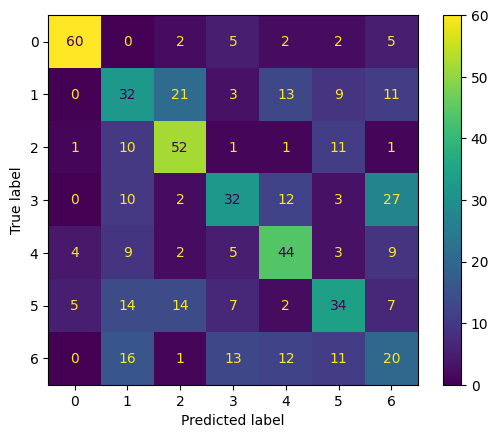

Training and Evaluating SVM-sigmoid
SVM-sigmoidAccuracy: 0.30892857142857144
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        76
           1       0.09      0.11      0.10        89
           2       0.26      0.14      0.18        77
           3       0.29      0.36      0.32        86
           4       0.47      0.20      0.28        76
           5       0.21      0.06      0.09        83
           6       0.19      0.44      0.26        73

    accuracy                           0.31       560
   macro avg       0.34      0.32      0.31       560
weighted avg       0.34      0.31      0.30       560



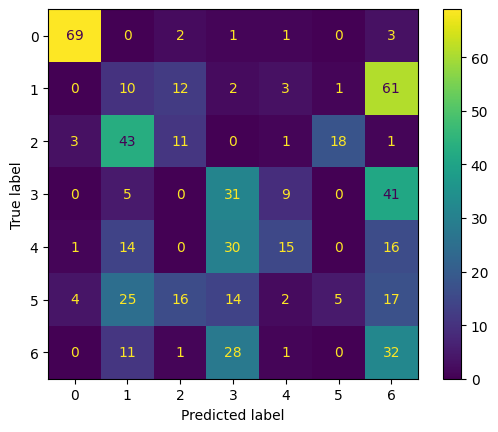

Training and Evaluating SVM-rbf
SVM-rbfAccuracy: 0.8267857142857142
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       0.70      0.78      0.73        89
           2       0.80      0.96      0.88        77
           3       0.76      0.77      0.76        86
           4       0.91      0.84      0.88        76
           5       0.93      0.76      0.83        83
           6       0.81      0.70      0.75        73

    accuracy                           0.83       560
   macro avg       0.84      0.83      0.83       560
weighted avg       0.83      0.83      0.83       560



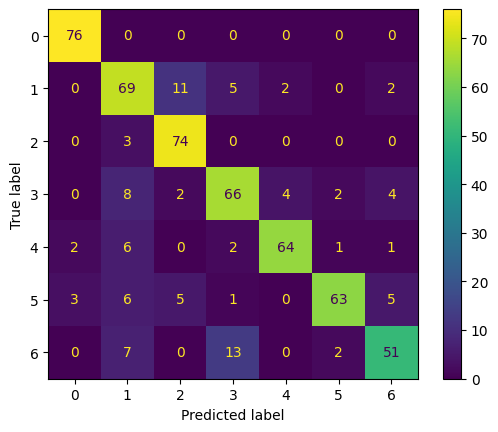

Training and Evaluating SVM-linear
SVM-linearAccuracy: 0.6196428571428572
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        76
           1       0.49      0.61      0.54        89
           2       0.69      0.71      0.70        77
           3       0.51      0.51      0.51        86
           4       0.59      0.58      0.58        76
           5       0.64      0.55      0.59        83
           6       0.55      0.38      0.45        73

    accuracy                           0.62       560
   macro avg       0.62      0.62      0.62       560
weighted avg       0.62      0.62      0.61       560



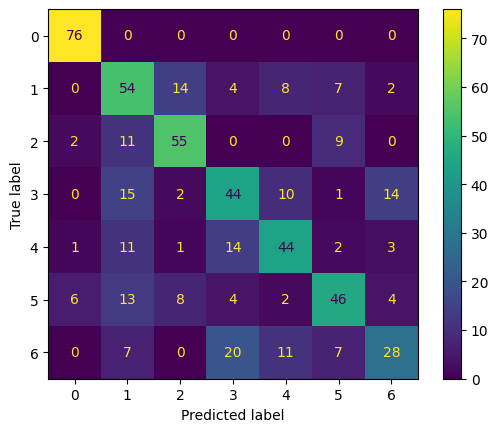

Training and Evaluating LGBMClassifier
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255000
[LightGBM] [Info] Number of data points in the train set: 2240, number of used features: 1000
[LightGBM] [Info] Start training from score -1.933488
[LightGBM] [Info] Start training from score -1.974438
[LightGBM] [Info] Start training from score -1.936579
[LightGBM] [Info] Start training from score -1.964838
[LightGBM] [Info] Start training from score -1.933488
[LightGBM] [Info] Start training from score -1.955329
[LightGBM] [Info] Start training from score -1.924271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

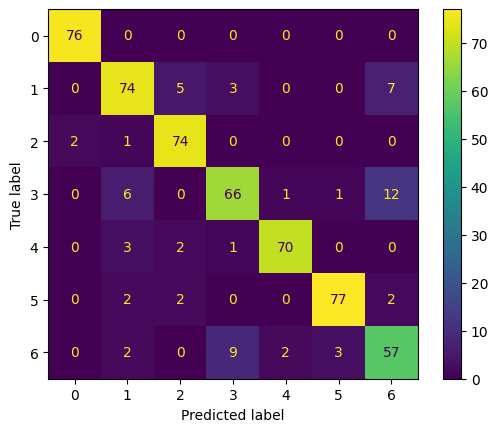

Training and Evaluating XGBClassifier
XGBClassifierAccuracy: 0.85
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        76
           1       0.84      0.80      0.82        89
           2       0.88      0.94      0.91        77
           3       0.79      0.74      0.77        86
           4       0.94      0.87      0.90        76
           5       0.92      0.87      0.89        83
           6       0.65      0.75      0.70        73

    accuracy                           0.85       560
   macro avg       0.85      0.85      0.85       560
weighted avg       0.85      0.85      0.85       560



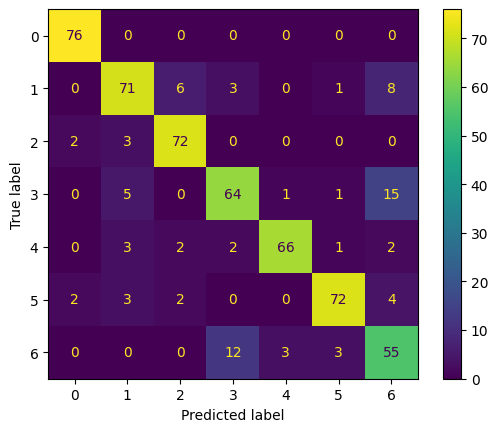

In [26]:
for clf_name,clf in classifiers.items():
  print(f"Training and Evaluating {clf_name}")
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f"{clf_name}Accuracy: {accuracy_score(y_test,y_pred)}")
  print(classification_report(y_test,y_pred))
  cm=confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
  disp.plot()
  plt.show()